In [3]:
pip install kaggle

In [4]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [5]:
!kaggle datasets download -d harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

  0% 0.00/175k [00:00<?, ?B/s]
100% 175k/175k [00:00<00:00, 50.2MB/s]


In [6]:
!unzip imdb-dataset-of-top-1000-movies-and-tv-shows.zip

Archive:  imdb-dataset-of-top-1000-movies-and-tv-shows.zip
  inflating: imdb_top_1000.csv       


In [82]:
import pandas as pd
df = pd.read_csv('imdb_top_1000.csv')

In [83]:
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [84]:
#checking null values
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [85]:
df['Certificate'] = df['Certificate'].fillna('')
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [86]:
# Replace missing values in column: 'Meta_score' with IMDB_Rating multiplied by 10
df = df.fillna({'Meta_score': (df['IMDB_Rating']*10)})
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [87]:
# Replace all instances of "," with "" in column: 'Gross'
df['Gross'] = df['Gross'].str.replace(",", "", case=False, regex=False).astype('Int64')

In [88]:
df = df.fillna({'Gross': df['Gross'].median()})

In [89]:
# Replace "PG" with "1995" in column: 'Released_Year'
df['Released_Year'] = df['Released_Year'].str.replace("PG", "1995", case=False, regex=False)

In [90]:
df.isna().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

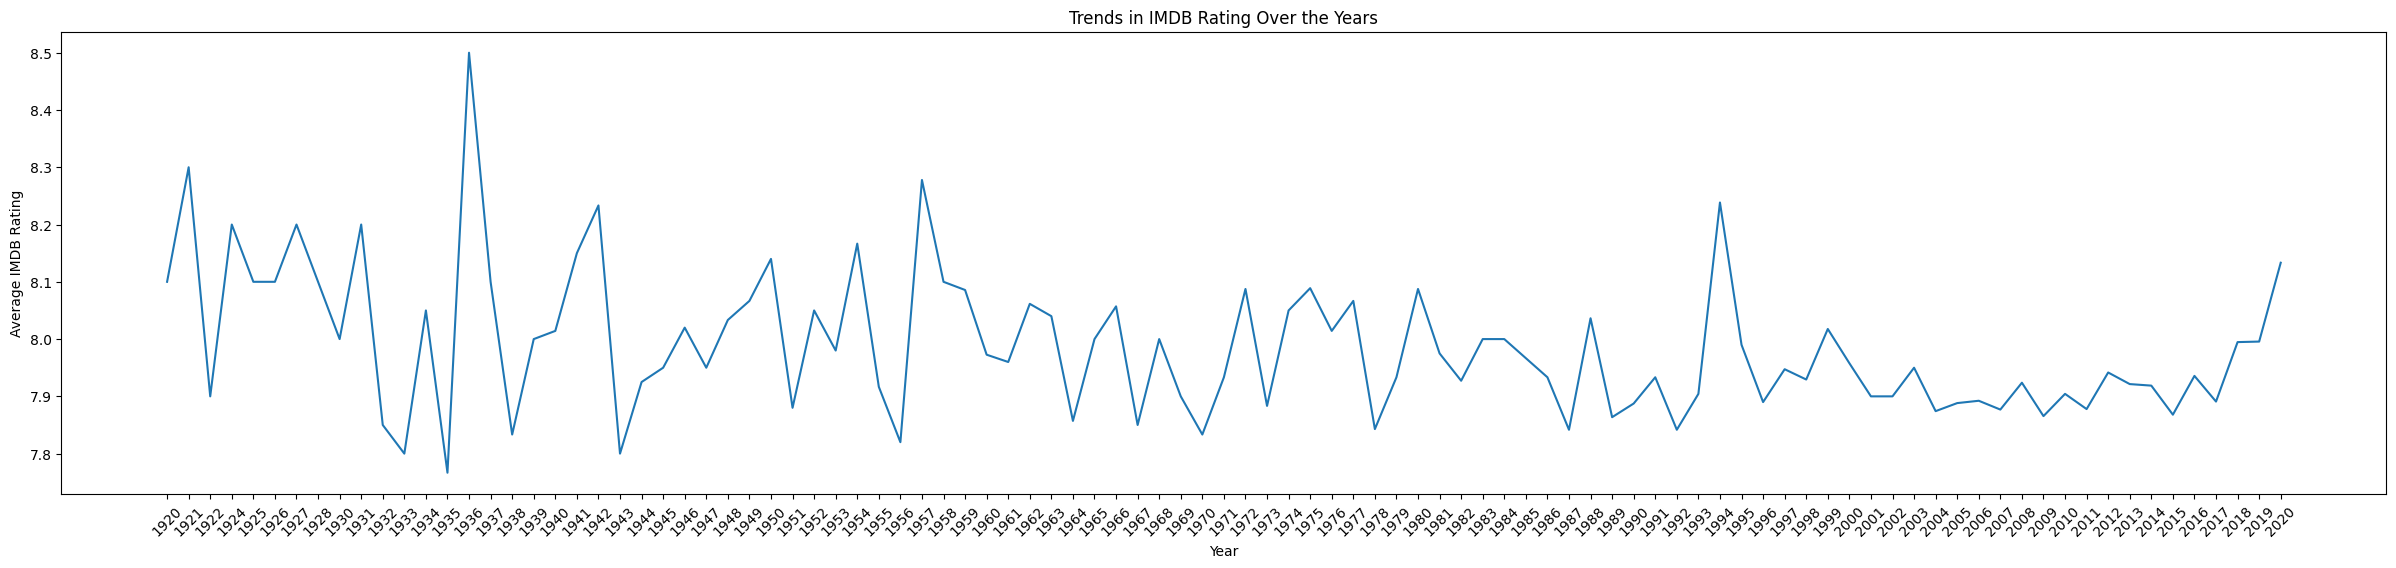

In [91]:
import matplotlib.pyplot as plt

# Extract year from 'Released_Year' column
df['Year'] = df['Released_Year'].str.extract('(\d{4})', expand=False)

# Group data by year and calculate average IMDB_Rating
average_ratings = df.groupby('Year')['IMDB_Rating'].mean()

# Create line plot
plt.figure(figsize=(30, 6))
plt.plot(average_ratings.index, average_ratings.values)
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.title('Trends in IMDB Rating Over the Years')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


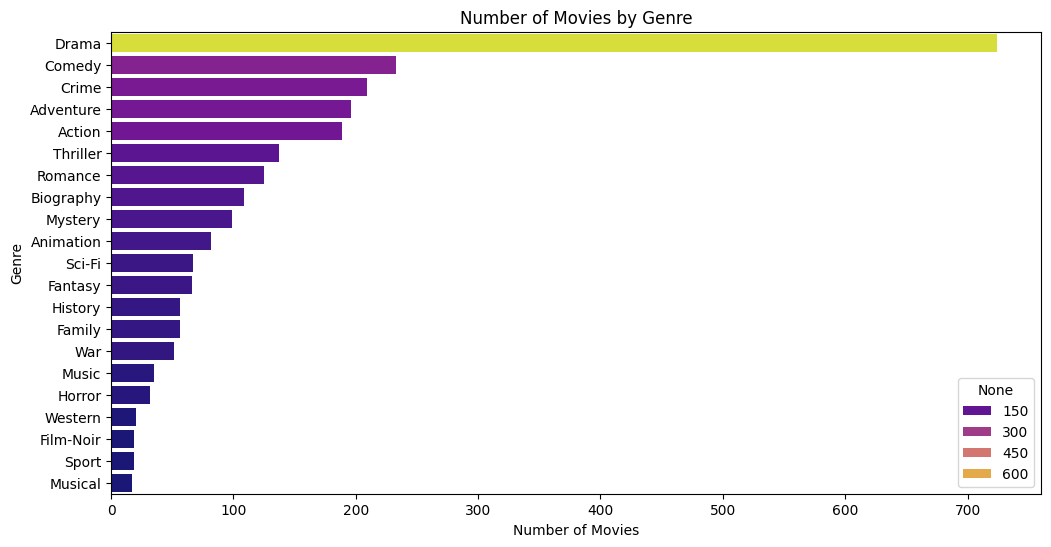

In [92]:
import seaborn as sns

genres = df['Genre'].str.split(', ', expand=True).stack()

# Count the occurrences of each genre
genre_counts = genres.value_counts()

# Plotting the counts using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts, palette='plasma')
plt.title('Number of Movies by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

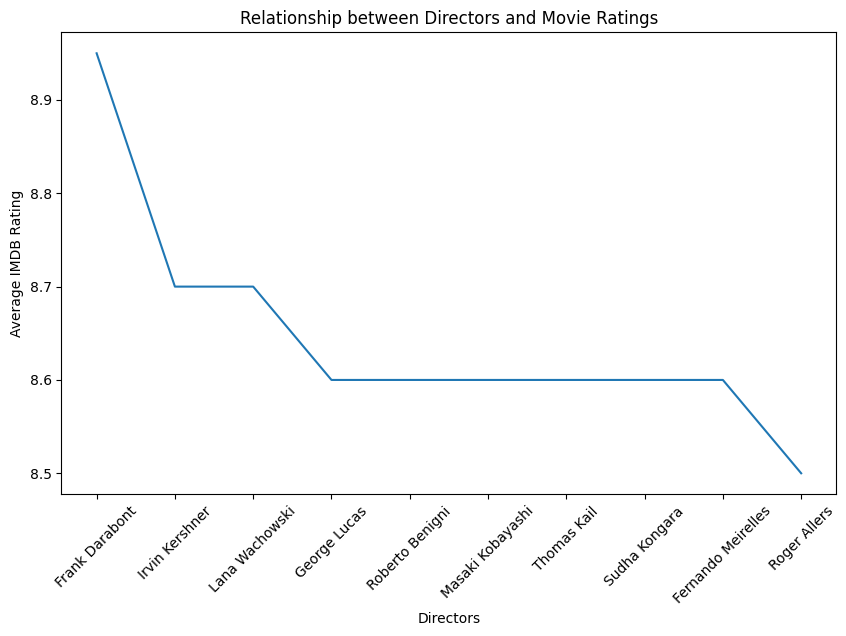

In [93]:
# Group data by director and calculate average IMDB_Rating
average_ratings_by_director = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False)

# Select top 10 directors with the highest average ratings
top_directors = average_ratings_by_director.head(10)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(top_directors.index, top_directors.values)
plt.xlabel('Directors')
plt.ylabel('Average IMDB Rating')
plt.title('Relationship between Directors and Movie Ratings')
plt.xticks(rotation=45)
plt.show()


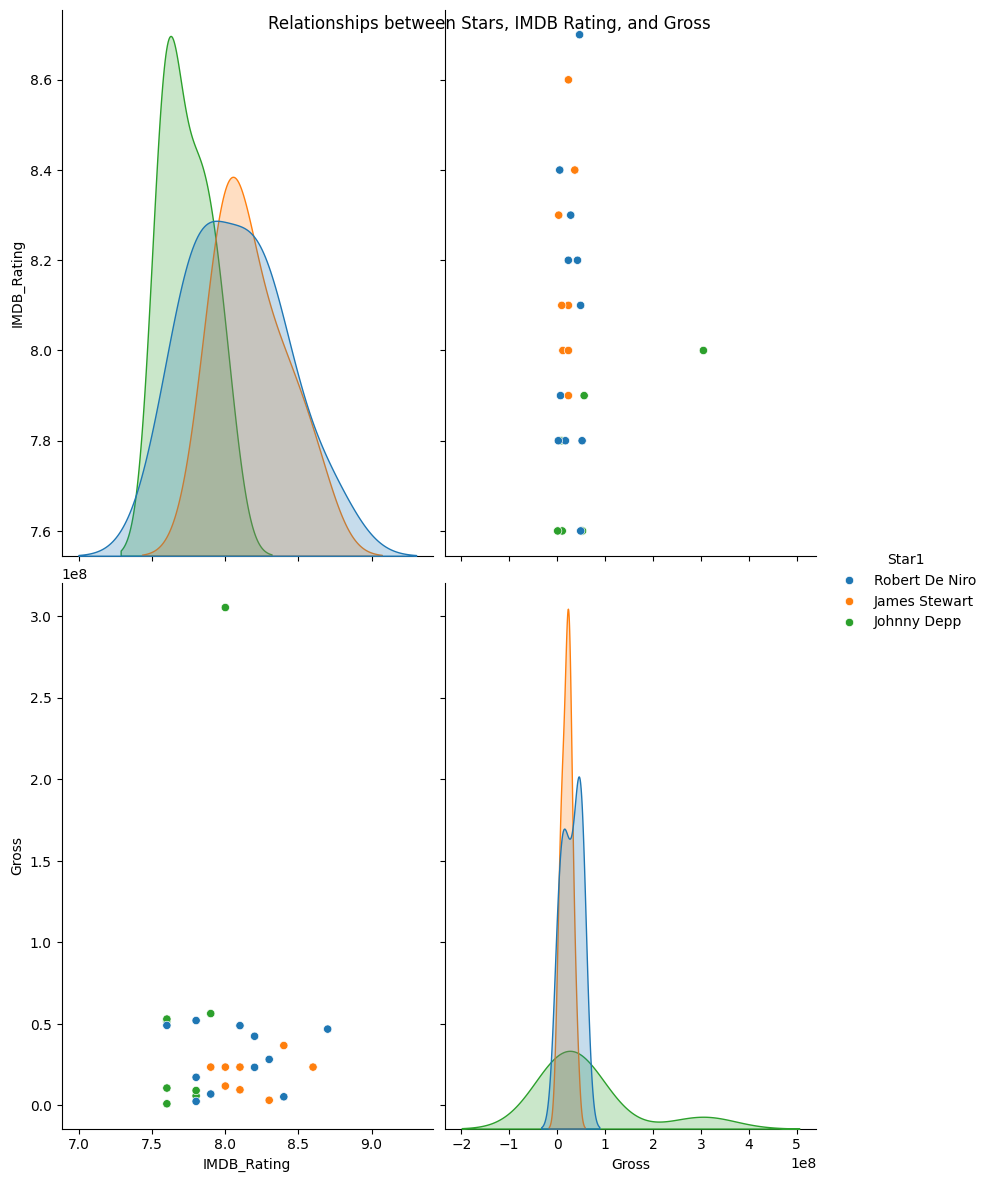

In [94]:
import random as rd

top_stars = df['Star1'].value_counts().head(10).index

random_star1_values = rd.choices(top_stars, k=5)
stars_and_ratings = df[df['Star1'].isin(random_star1_values)]
stars_and_ratings = stars_and_ratings[['IMDB_Rating', 'Gross', 'Star1', 'Star2', 'Star3', 'Star4']]
sns.pairplot(stars_and_ratings, height=6, aspect=0.7, hue='Star1')
plt.suptitle('Relationships between Stars, IMDB Rating, and Gross')
plt.show()

In [114]:
def get_main_genre(genre_string):
    genres = genre_string.split(', ')
    return genres[0]

df['main_genre'] = df['Genre'].apply(get_main_genre)
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year,main_genre
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,1994,Drama
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,1972,Crime
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,2008,Action
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,1974,Crime
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,1957,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,23530892,1961,Comedy
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,23530892,1956,Drama
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000,1953,Drama
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,23530892,1944,Drama


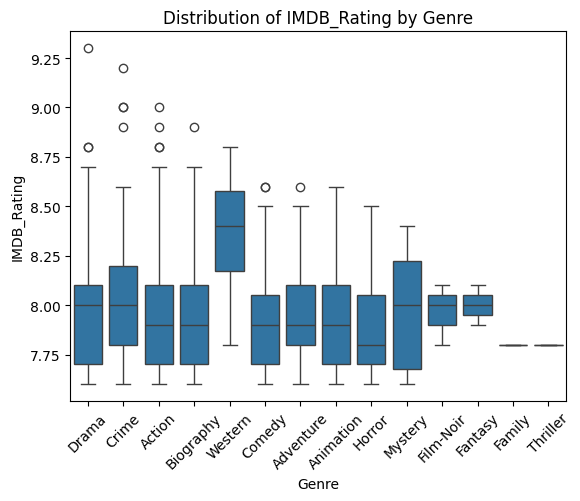

In [115]:
# Create a box plot of IMDB_Rating by Genre
sns.boxplot(data=df, x='main_genre', y='IMDB_Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a title and labels
plt.title('Distribution of IMDB_Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDB_Rating')

# Show the plot
plt.show()


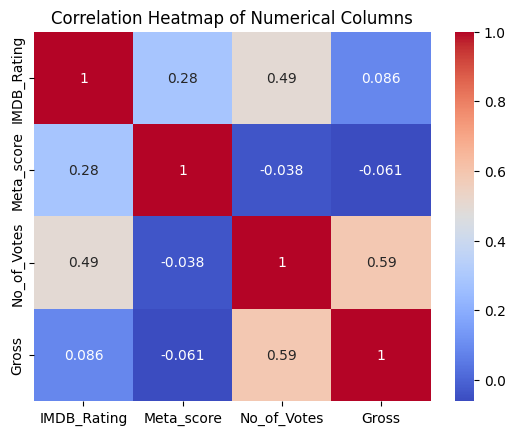

In [117]:
# Select the numerical columns
numerical_columns = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

# Create a heatmap
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')

# Add a title and show the plot
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()
